In [ ]:
!pip install seaborn scikit-learn matplotlib pandas


In [50]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()


Saving Iris.csv to Iris (11).csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [52]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [53]:
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


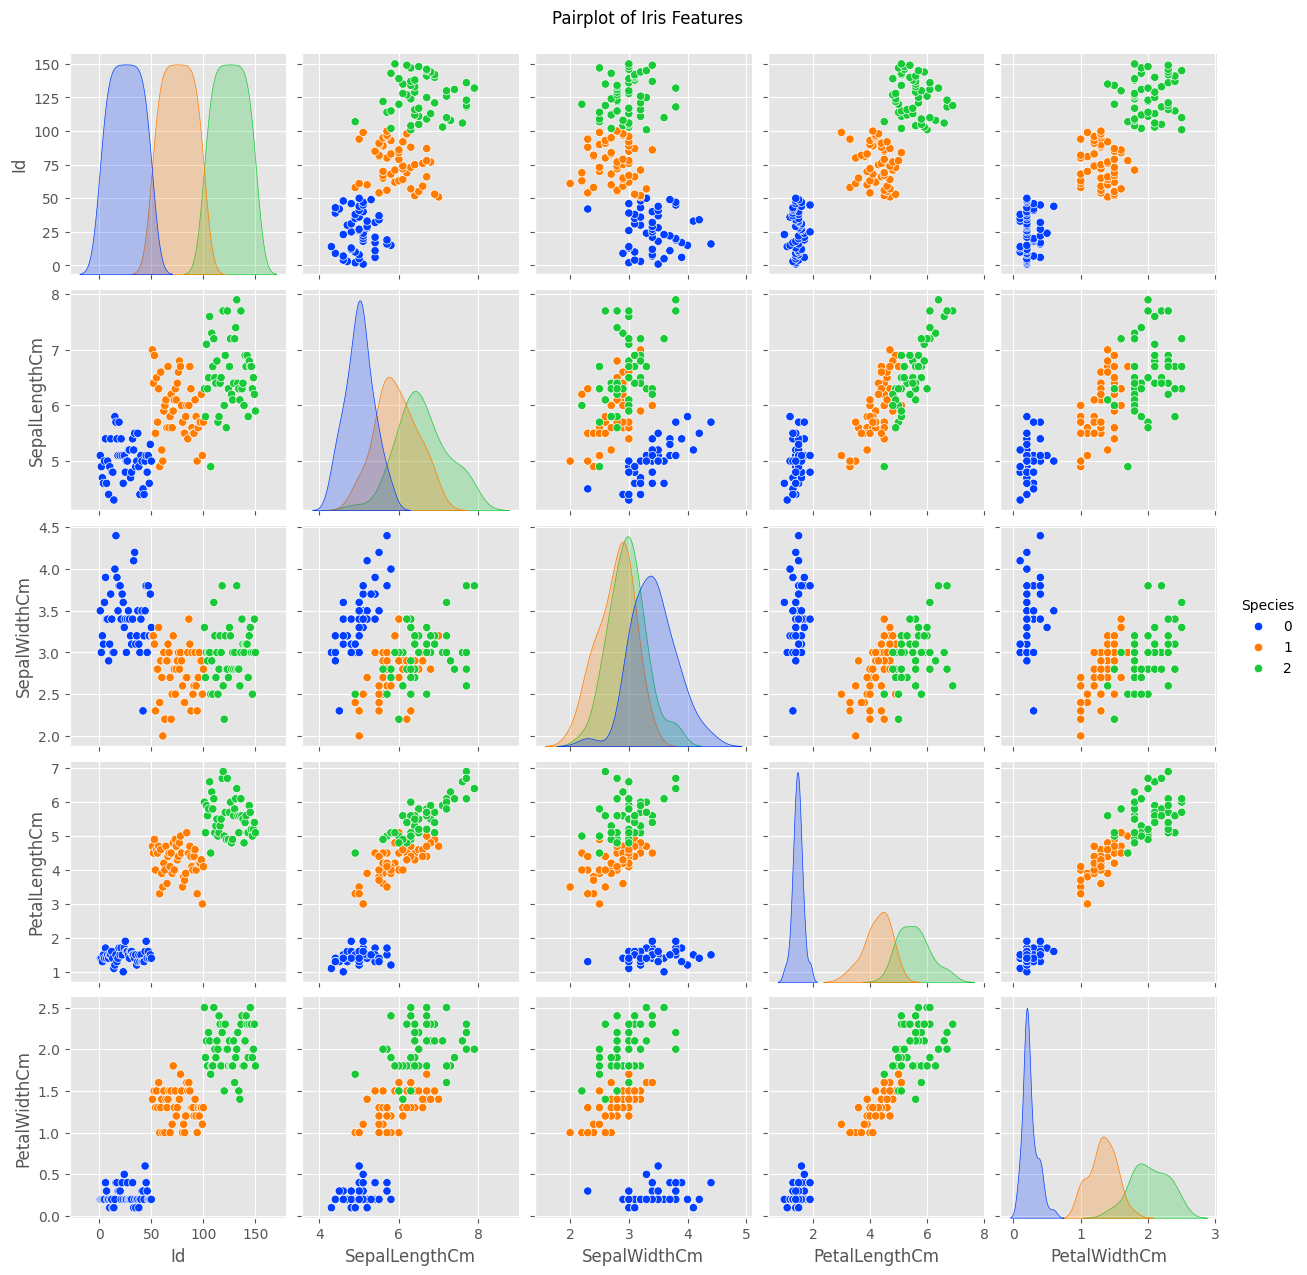

In [54]:
sns.pairplot(df, hue="Species", palette="bright")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

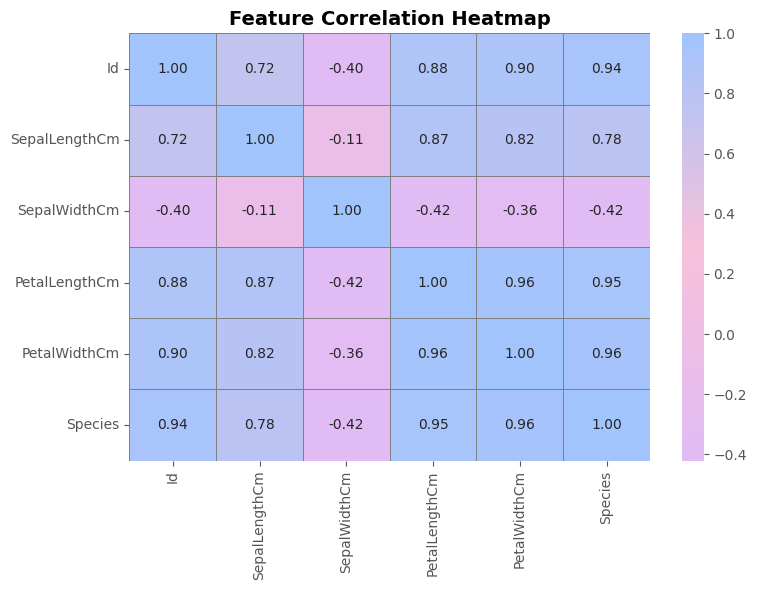

In [55]:
from matplotlib.colors import LinearSegmentedColormap
purple_pink_blue = LinearSegmentedColormap.from_list("purple_pink_blue", ["#e0bbf4", "#f7c1da", "#a1c4fd"])
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap=purple_pink_blue, fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [56]:
X = df.drop("Species", axis=1)
y = df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

 Logistic Regression Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.80      0.84        10
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



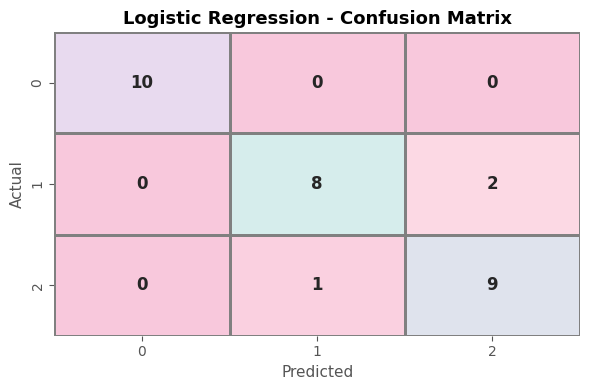

 Random Forest Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



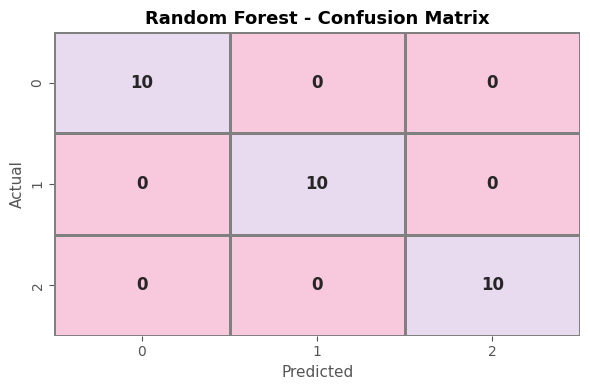

 Support Vector Machine Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



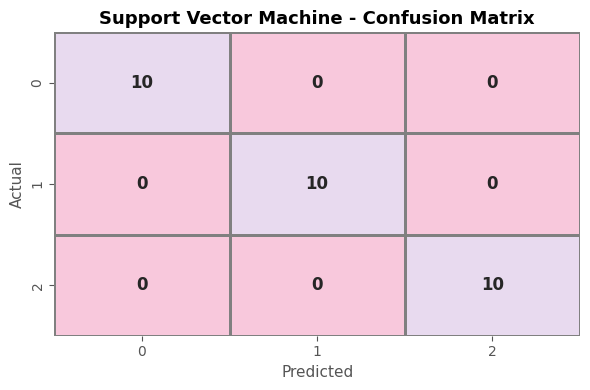

 K-Nearest Neighbors Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



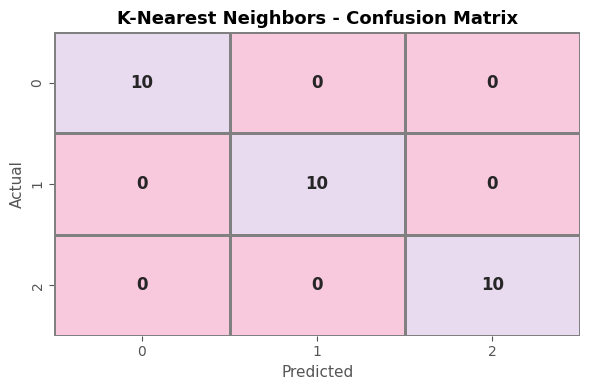

In [57]:
from matplotlib.colors import LinearSegmentedColormap
pastel_cmap = LinearSegmentedColormap.from_list("pastel", ["#f8c8dc", "#fddde6", "#d6eaf8", "#d1f2eb", "#e8daef"])
models = {
    "Logistic Regression": LogisticRegression(C=1.0, solver='liblinear', max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}
results = {}
plt.style.use("ggplot")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f" {name} Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap=pastel_cmap, cbar=False,linewidths=0.8, linecolor='gray', annot_kws={"size": 12, "weight": "bold"})
    plt.title(f"{name} - Confusion Matrix", fontsize=13, fontweight='bold')
    plt.xlabel("Predicted", fontsize=11)
    plt.ylabel("Actual", fontsize=11)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

<ipython-input-58-5ba009414d5b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette=custom_colors)
<ipython-input-58-5ba009414d5b>:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=list(results.keys()), y=list(results.values()), palette=custom_colors)


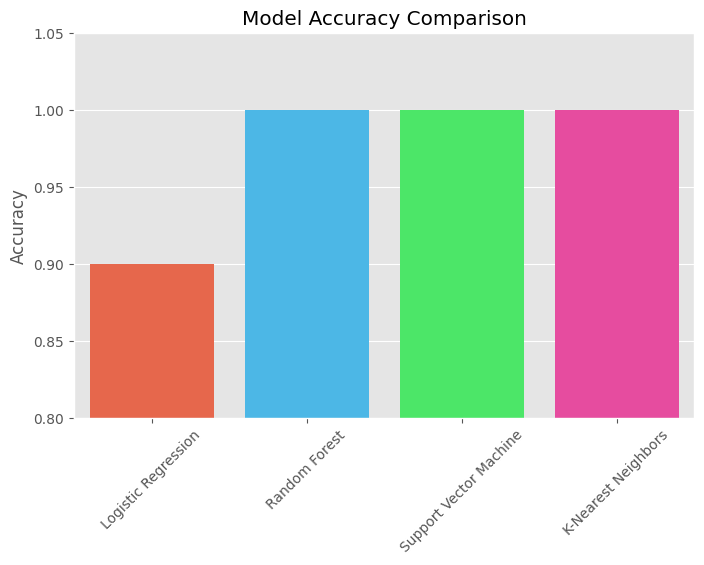

In [58]:
custom_colors = ["#FF5733", "#33C1FF", "#33FF57", "#FF33A1", "#FF8F33"]
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette=custom_colors)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.05)
plt.xticks(rotation=45)
plt.show()